In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_frame = pd.read_csv('./train.csv')

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2]:
print(data_frame['LotShape'].unique())
print(data_frame['LotShape'].isnull().sum())

['Reg' 'IR1' 'IR2' 'IR3']
0


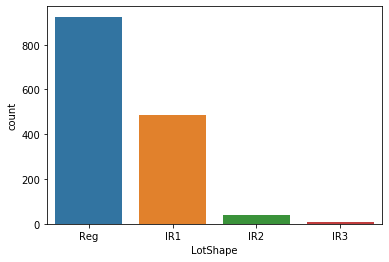

In [3]:
#frequency of LotShape
sns.countplot(data = data_frame, x = 'LotShape')

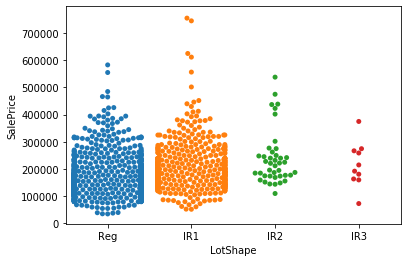

In [5]:
#second plot
sns.swarmplot(data = data_frame, x='LotShape', y='SalePrice')

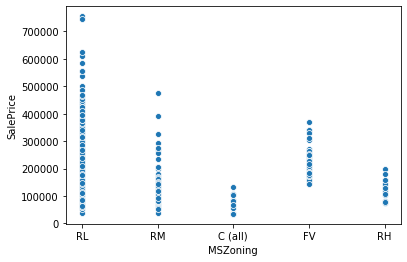

In [6]:
sns.scatterplot(data = data_frame, x='MSZoning', y='SalePrice')

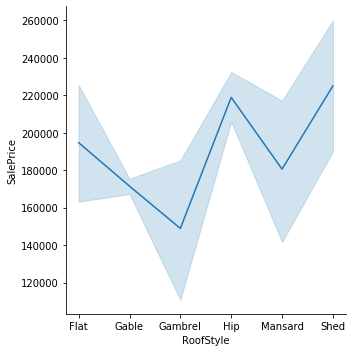

In [7]:
sns.relplot(data = data_frame, x='RoofStyle', y='SalePrice',kind='line')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


data_frame_1 = data_frame
new_data = data_frame_1.select_dtypes(exclude=['object'])

#check null values
nulls = pd.DataFrame(new_data.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
# print(nulls)
# print("\n")

#remove null values
new_data = new_data.dropna()
# print(new_data.isnull().sum())

x = new_data.drop('SalePrice',axis = 1)
y = new_data['SalePrice']

X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size=0.4, random_state=0)

model = GaussianNB()
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)


score = accuracy_score(Y_test,y_pred)*100
print("accuracy score: " + str(score))

print(classification_report(Y_test, y_pred))





accuracy score: 0.4454342984409799
              precision    recall  f1-score   support

       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         1
       73000       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       76000       0.00      0.00      0.00         1
       78000       0.00      0.00      0.00         1
       79000       0.00      0.00      0.00         1
       79500       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         2
       81000       0.00      0.00      0.00         1
       82500       0.00      0.00      0.00         1
       83000       0.00      0.00      0.00         1
       85000       0.00      0.00      0.00         1
       85400       0.00      0.00      0.00         1
       86000       0.00      0.00      0.00         2
       87000       0.00      0.00      0.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
score = knn.score(X_test,Y_test)*100
print("KNN socre: " + str(score))

KNN socre: 0.4454342984409799


In [11]:
#SVC linear
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

svclassifier = LinearSVC()
svclassifier.fit(X_train, Y_train)

y_pred = svclassifier.predict(X_test)
# print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       55993       0.00      0.00      0.00       1.0
       60000       0.00      0.00      0.00       1.0
       67000       0.00      0.00      0.00       1.0
       73000       0.00      0.00      0.00       1.0
       75000       0.00      0.00      0.00       1.0
       76000       0.00      0.00      0.00       1.0
       78000       0.00      0.00      0.00       1.0
       79000       0.00      0.00      0.00       1.0
       79500       0.00      0.00      0.00       1.0
       80000       0.00      0.00      0.00       2.0
       81000       0.00      0.00      0.00       1.0
       82500       0.00      0.00      0.00       1.0
       83000       0.00      0.00      0.00       1.0
       85000       0.00      0.00      0.00       1.0
       85400       0.00      0.00      0.00       1.0
       86000       0.00      0.00      0.00       2.0
       87000       0.00      0.00      0.00       2.0
       88000       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#SVC non linear
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)

y_pred1 = svclassifier.predict(X_test)

print(classification_report(Y_test,y_pred))

In [19]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC, SVC



svclassifier.fit(X_train, Y_train)
clf_1 = LinearSVC().fit(X_train, Y_train)
clf_2 = SVC().fit(X_train, Y_train)


X_test
score_1 = clf_1.score(X_test, Y_test)*100
print(score_1)
score_2 = clf_2.score(X_test, Y_test)*100
print(score_2)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.22271714922048996
1.7817371937639197
